In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from scipy.stats import expon
from scipy.stats import uniform

In [1]:
muestra = [42, 35, 29, 45, 41, 57, 54, 47, 48, 56, 47, 35, 52, 31, 52, 55, 57, 58, 26, 29, 32, 37, 32, 34, 48, 20, 48, 51, 27, 24, 39, 40, 31, 34, 23, 24, 41, 58, 44, 48, 31, 23, 27, 55, 43, 47, 30, 57, 38, 51]
muestra

[42,
 35,
 29,
 45,
 41,
 57,
 54,
 47,
 48,
 56,
 47,
 35,
 52,
 31,
 52,
 55,
 57,
 58,
 26,
 29,
 32,
 37,
 32,
 34,
 48,
 20,
 48,
 51,
 27,
 24,
 39,
 40,
 31,
 34,
 23,
 24,
 41,
 58,
 44,
 48,
 31,
 23,
 27,
 55,
 43,
 47,
 30,
 57,
 38,
 51]

In [4]:
len(muestra)

50

In [5]:
# Hipotesis
media, var, skew, kurt = expon.stats(scale=30, moments='mvsk')

In [7]:
# Paso 1: Parametro lambda
# Paso 2: Hipotesis
mu = 30
mu > 30
# Paso 3: Mejor estimador
# Estimador
# Paso 4: Distribución
promedio = np.mean(muestra)
promedio

40.66

In [43]:
# Paso 5
z = (promedio - mu) / np.sqrt(var / 50)
z

2.5125860958161983

In [44]:
# Paso 6
alpha = 0.05
alpha

0.05

In [45]:
# Criterios de rechazo
from scipy.stats import norm
data_norm = norm.rvs( size=1000000 )
data_norm

array([ 0.27610379,  0.61130915,  0.91239505, ..., -1.07844795,
        0.61161853, -0.75737181])

Text(0.5, 1.0, 'Distribución normal')

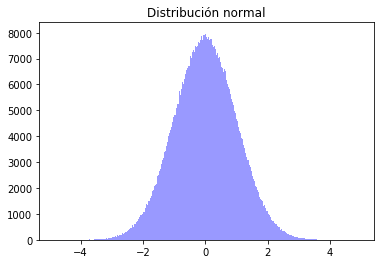

In [46]:
ax = sns.distplot(data_norm, bins=500, kde=False, color='blue')
ax.set_title('Distribución normal')

In [47]:
valor_critico = norm.ppf(1-alpha, loc = 0, scale=1)
valor_critico

1.6448536269514722

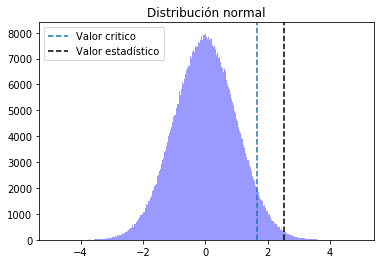

In [48]:
ax = sns.distplot(data_norm, bins=500, kde = False, color='blue')
ax.set_title('Distribución normal')
ax.axvline(x = valor_critico, linestyle = '--', label='Valor critico')
ax.axvline(x = z, linestyle = '--', label='Valor estadístico', color='k')
ax.legend()

In [50]:
# Errores estadísticos
muestra
#
mu1 = 37
mu2 = 42
promedio = np.mean(muestra)
promedio
desv = 2
z_1 = (promedio - mu1)/desv
z_2 = (promedio - mu2)/desv
z_1, z_2

(1.8299999999999983, -0.6700000000000017)

In [51]:
from scipy.stats import norm
data1 = norm.rvs(loc = mu1, scale=desv, size = 1000000)
data2 = norm.rvs(loc = mu2, scale=desv, size = 1000000)

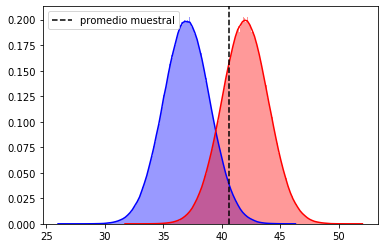

In [54]:
ax = sns.distplot(data1, bins=500, kde=True, color='blue')
ax = sns.distplot(data2, bins=500, kde=True, color='red')
ax.axvline(x = promedio, c='k', linestyle='--', label='promedio muestral')
ax.legend()

In [55]:
# Error tipo_1: p rechazar h0 cuando está es verdadera
p_prom_mu1 = norm.cdf(z_1)
1 - p_prom_mu1

0.03362496941962845

In [57]:
# Error 2: Probablididad de no rechazar h0 cuando esta es falsa
p_prom_mu2 = norm.cdf(z_2)
p_prom_mu2

0.2514288950953095

In [60]:
# Intervalos de confianza
Muestra = [4046, 2578, 3796, 3412, 3315, 3228, 3666, 3877, 3154, 4062, 4365, 3776, 3761, 2587, 2911, 3184, 3810, 4459, 3385, 3899, 3602, 2701, 2821, 2790, 2557, 2540, 4119, 2712, 2743, 2713, 4466, 3937, 3871, 4427, 3177, 2556, 2903, 3522, 4155, 4010, 4453, 3080, 3008, 3865, 3356, 2799, 3308, 2759, 4347, 2576, 4075, 3333, 2936, 3746, 3334, 3940, 4113, 4220, 3580, 3922]
Muestra

[4046,
 2578,
 3796,
 3412,
 3315,
 3228,
 3666,
 3877,
 3154,
 4062,
 4365,
 3776,
 3761,
 2587,
 2911,
 3184,
 3810,
 4459,
 3385,
 3899,
 3602,
 2701,
 2821,
 2790,
 2557,
 2540,
 4119,
 2712,
 2743,
 2713,
 4466,
 3937,
 3871,
 4427,
 3177,
 2556,
 2903,
 3522,
 4155,
 4010,
 4453,
 3080,
 3008,
 3865,
 3356,
 2799,
 3308,
 2759,
 4347,
 2576,
 4075,
 3333,
 2936,
 3746,
 3334,
 3940,
 4113,
 4220,
 3580,
 3922]

In [62]:
from scipy.stats import norm
# Tolerancia al error
alpha = 0.05
lim_inf = norm.ppf(alpha/1)
lim_sup = norm.ppf(1 - (alpha/1))
lim_inf, lim_sup

(-1.6448536269514729, 1.6448536269514722)

In [63]:
promedio = np.mean(Muestra)
desviacion = np.std(Muestra)
len(Muestra)

60

In [64]:
lim_inf = lim_inf*desviacion + promedio
lim_sup = lim_sup*desviacion + promedio
lim_inf, lim_sup

(2494.1372815063205, 4450.629385160346)